# Data Mining and Probabilistic Reasoning, WS18/19


Dr. Gjergji Kasneci, The University of Tübingen

-----
## Statistics in Python Tutorial
-----

###### Date 29/10/2018

Teaching assistants:

 - Vadim Borisov (vadim.borisov@uni-tuebingen.de)

 - Johannes Haug (johannes-christian.haug@uni-tuebingen.de)

# Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

flats = pd.read_csv('./data/flats_tuebingen.csv', encoding = "utf-8")
wine = pd.read_csv('./data/wine_data.csv', delim_whitespace=1)

# Mean, Median, Mode & Standard Deviation
Each dataset can be described in terms of certain characteristics/metrics. Mean, median, mode and standard deviation belong to the basic metrics a data scientist should be aware of. We will introduce those metrics before targeting some of the more complex concepts.

## The dataset
Imagine you are currently looking for a flat in Tübingen. It's difficult to choose a flat without having knowledge about the real estate market. How would we know what is a fair rent and what is not? Some basic metrics might help us to make a decision.<br>
We found the following 10 flats on wg-gesucht for Tübingen:

In [2]:
flats

,flat_no,rent,size,location
0,1,200,20,Oesterberg
1,2,587,21,Innenstadt
2,3,185,22,Oesterberg
3,4,420,15,Waldhaeuser-Ost
4,5,350,22,Lustnau
5,6,420,11,Weststadt
6,7,200,16,Oesterberg
7,8,570,20,Weststadt
8,9,185,15,Innenstadt
9,10,430,16,Innenstadt


## Mean
Let's calcualate the average rent for our 10 flats. The average of a set of values can be described in terms of their mean $\bar{X}$ (with the number of values $n$): $$\bar{X} = \frac{1}{n}\sum^n_{i=1}x_i$$
We can use the mean function provided by pandas to calculate the mean rent for our flats:

In [3]:
mean = flats['rent'].mean()
print('The average rent of our 10 flats is {}€'.format(round(mean)))

The average rent of our 10 flats is 355.0€


## Median
The median is the middle value of a sorted list. If we sort our flats based on the rent we can see that the median of the rent column could be either 350€ or 420€. In case of an even number of values $n$ we take the mean of the two candidate values and define that our median. In our case that would be $$Median = \frac{350€+420€}{2} = 385€$$ Since it becomes quite cumbersome to detect the median for large datasets by simply looking at the data, pandas offers a function to calculate the median for us:

In [4]:
print(flats.sort_values(by=['rent']))

median = flats['rent'].median()
print('The median for the rent column of our dataset is {}€'.format(round(median)))

   flat_no  rent  size         location
2        3   185    22       Oesterberg
8        9   185    15       Innenstadt
0        1   200    20       Oesterberg
6        7   200    16       Oesterberg
4        5   350    22          Lustnau
3        4   420    15  Waldhaeuser-Ost
5        6   420    11        Weststadt
9       10   430    16       Innenstadt
7        8   570    20        Weststadt
1        2   587    21       Innenstadt
The median for the rent column of our dataset is 385.0€


## Mode
We call the most frequent value of a dataset its mode. If we have a look at our rents, we can see that the values 185€, 200€ and 420€ all appear twice, which is why we have a total of 3 modes for the rent column of our dataset. Let's confirm this with the pandas function for the mode:

In [5]:
mode = flats['rent'].mode()
print('The modes for the rent column of our dataset are {}€, {}€ and {}€.'.format(*mode.values))

The modes for the rent column of our dataset are 185€, 200€ and 420€.


## Standard deviation
So now we know that people are paying a rent of 355€ on average (mean) and that the rents most often payed are 185€, 200€ and 420€. Yet it would be interesting to know how much rents differ among one another. The standard deviation tells us how far values spread from the mean $\bar{X}$: $$S = \sqrt{\frac{1}{n} \sum^n_{i=1}(x_i-\bar{X})^2}$$
Again we can use a pandas function to calculate the standard deviation for the rent column of our dataset:

In [6]:
std = flats['rent'].std()
print('The standard deviation for the rent column is {}€.'.format(round(std,2)))

The standard deviation for the rent column is 156.35€.


This standard deviation seems pretty big, which is caused by the small size of our dataset. Adding additional values to the dataset would make it appear more normally distributed. Let's have a look at the actual distribution of our dataset by plotting the histogram and Probability Density Function (PDF) for the rent column:

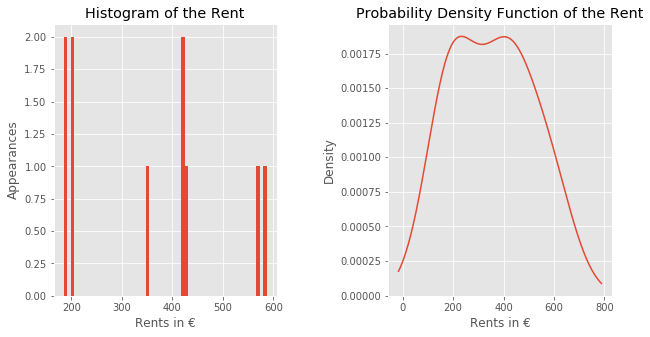

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(flats['rent'], bins= int(400/7))
axs[0].set_title('Histogram of the Rent')
axs[0].set_xlabel('Rents in €')
axs[0].set_ylabel('Appearances')

axs[1] = flats['rent'].plot.kde()
axs[1].set_title('Probability Density Function of the Rent')
axs[1].set_xlabel('Rents in €')

plt.subplots_adjust(wspace=0.5)
plt.show()

# The Wine dataset
Now that we understand how to calculate basic statistical metrics in Python, we want to continue with some of the more complex ones. For that we will introduce a new dataset: the wine dataset. Let's have a quick look at the first 5 entries to familiarize with the data: 

In [8]:
wine.head()

,Type,Fixed_acidity_(g/l),Volatile_acidity_(g/l),Citric_acid_(g/l),Residual_sugar_(g/l),Chlorides_(g/l),Free_sulfur_dioxide_(mg/l),Total_sulfur_dioxide_(mg/l),Density_(g/cm3),pH,Sulphates_(g/l),Alcohol_(%),quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The dataset is the result of a quality assessement of different red and white variants of the Portuguese "Vinho Verde" wine. Each wine is represented as a row in the dataset, including different objective tests (see all features except the *quality*). The *quality* is the median of at least 3 evaluations by different experts, where 0 indicates a "very bad" and 10 indicates a "very excellent" wine. For more information about the data consult the official [description](http://archive.ics.uci.edu/ml/datasets/Wine+Quality?ref=datanews.io).

# Variance
The variance of a variable describes how much its values are spread. It is the squared standard deviation and can thus be described as follows (with mean $\bar{X}$ and the number of values $n$): $$S^2_{em} = \frac{1}{n} \sum^n_{i=1}(x_i-\bar{X})^2$$
In the following we calculate the variance for the *pH* variable of our wine dataset on our own. We can evaluate our result by comparing it against the outcome of the *numpy.var()* function:

In [9]:
pH = wine['pH'] 
n = len(wine)
X = pH.mean()

sum_of_X_diff = 0

for x in pH:
    sum_of_X_diff += (x-X)**2
    
S = sum_of_X_diff/n

print("Variance of pH as calculated with our code: {0:.4f}".format(S))

#check our result against the built in variance function of numpy
print("Variance of pH as calculated with numpy.var(): {0:.4f}".format(np.var(wine['pH'])))

Variance of pH as calculated with our code: 0.0258
Variance of pH as calculated with numpy.var(): 0.0258


# Covariance
The covariance describes the dependency between two variables. It is a measure indicating whether the increase in one variable is associated with the increase in another. It can be described as follows (with means $\bar{X}$ and $\bar{Y}$ and the amount of values $n$): $$\hat{C}_{em} = \frac{1}{n} \sum^n_{i=1}(x_i - \bar{X})(y_i - \bar{Y})$$

**Task:** Implement an algorithm that calculates the covariance for the two variables *pH* and *Alcohol_(%)*. Compare your result to the *numpy.cov()* function.

In [11]:
#pH, n and X are already declared
alc = wine['Alcohol_(%)']
##################SOLUTION#################


C = 0
##################SOLUTION#################
print("Covariance of pH and alcohol calculated with your code: {0:.4f}".format(C))

#check your result against the built in covariance function of numpy
cov = np.cov(wine[['pH','Alcohol_(%)']], rowvar=False, bias = True) #set bias to True to normalize by n 
print("Covariance of pH and alcohol as calculated with numpy.cov(): {0:.4f}".format(cov[0,1]))

Covariance of pH and alcohol calculated with your code: 0.0000
Covariance of pH and alcohol as calculated with numpy.cov(): 0.0232


# Correlation
The correlation is also an indicator for the relationship between two variables. It is a scaled version of the covariance that can take any value between -1 and 1, where 0 indicates no correlation. The correlation of two variables can be described as follows (with the covariance $\hat{C}$ and the standard deviations $S_X$ and $S_Y$): $$r = \frac{\hat{C}}{S_{X}S_{Y}}$$

In this tutorial we always refer to the Pearson correlation coefficient, but be aware that there are other correlation coefficients that might be more suitable in a different (non-linear) scenario. This [paper](http://ljs.academicdirect.ro/A09/179_200.pdf) includes a description of different correlation coefficients.

**Task**: Implement an algorithm that calculates the correlation between the two variables *pH* and *Alcohol_(%)*. Compare your result to the *numpy.corrcoef()* function. To calculate the standard deviation you can use the function provided by pandas.

In [12]:
##################SOLUTION#################


r = 0
##################SOLUTION#################
print("Correlation of pH and alcohol calculated with your code: {0:.4f}".format(r))

#check your result against the built in covariance function of numpy
corr = np.corrcoef(wine[['pH','Alcohol_(%)']], rowvar=False)
print("Covariance of pH and alcohol as calculated with numpy.cov(): {0:.4f}".format(corr[0,1]))

Correlation of pH and alcohol calculated with your code: 0.0000
Covariance of pH and alcohol as calculated with numpy.cov(): 0.1212


# Visualize correlation
We can use the matplotlib package to visualize relationships among variables. In our case we want to visualize the correlation of *pH* and *Alcohol_(%)* using a scatter plot.

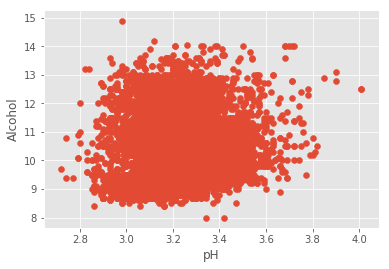

In [13]:
plt.scatter(pH,alc)
plt.xlabel('pH')
plt.ylabel('Alcohol')
plt.show()

## Plot correlation as heatmap
To get an overview of the correlations among all different variables in the wine dataset, we can plot the pandas correlation matrix of our dataframe as a heatmap:

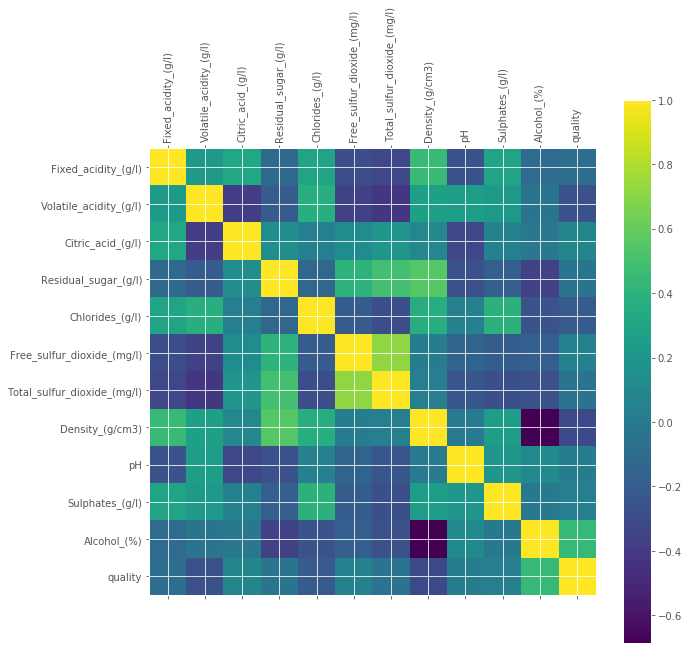

In [14]:
cm = wine.corr() #create correlation matrix with pandas corr() function

fig, ax = plt.subplots(figsize=(10,10))
col = ax.matshow(cm)

plt.colorbar(col)
plt.xticks(range(len(cm.columns)), cm.columns, rotation = 90)
plt.yticks(range(len(cm.columns)), cm.columns)

plt.show()

## Plot correlation as scatter matrix
Alternatively we can plot a matrix containing the scatter chart for each combination of variables. However, this matrix might get confusing with an increasing number of variables. 

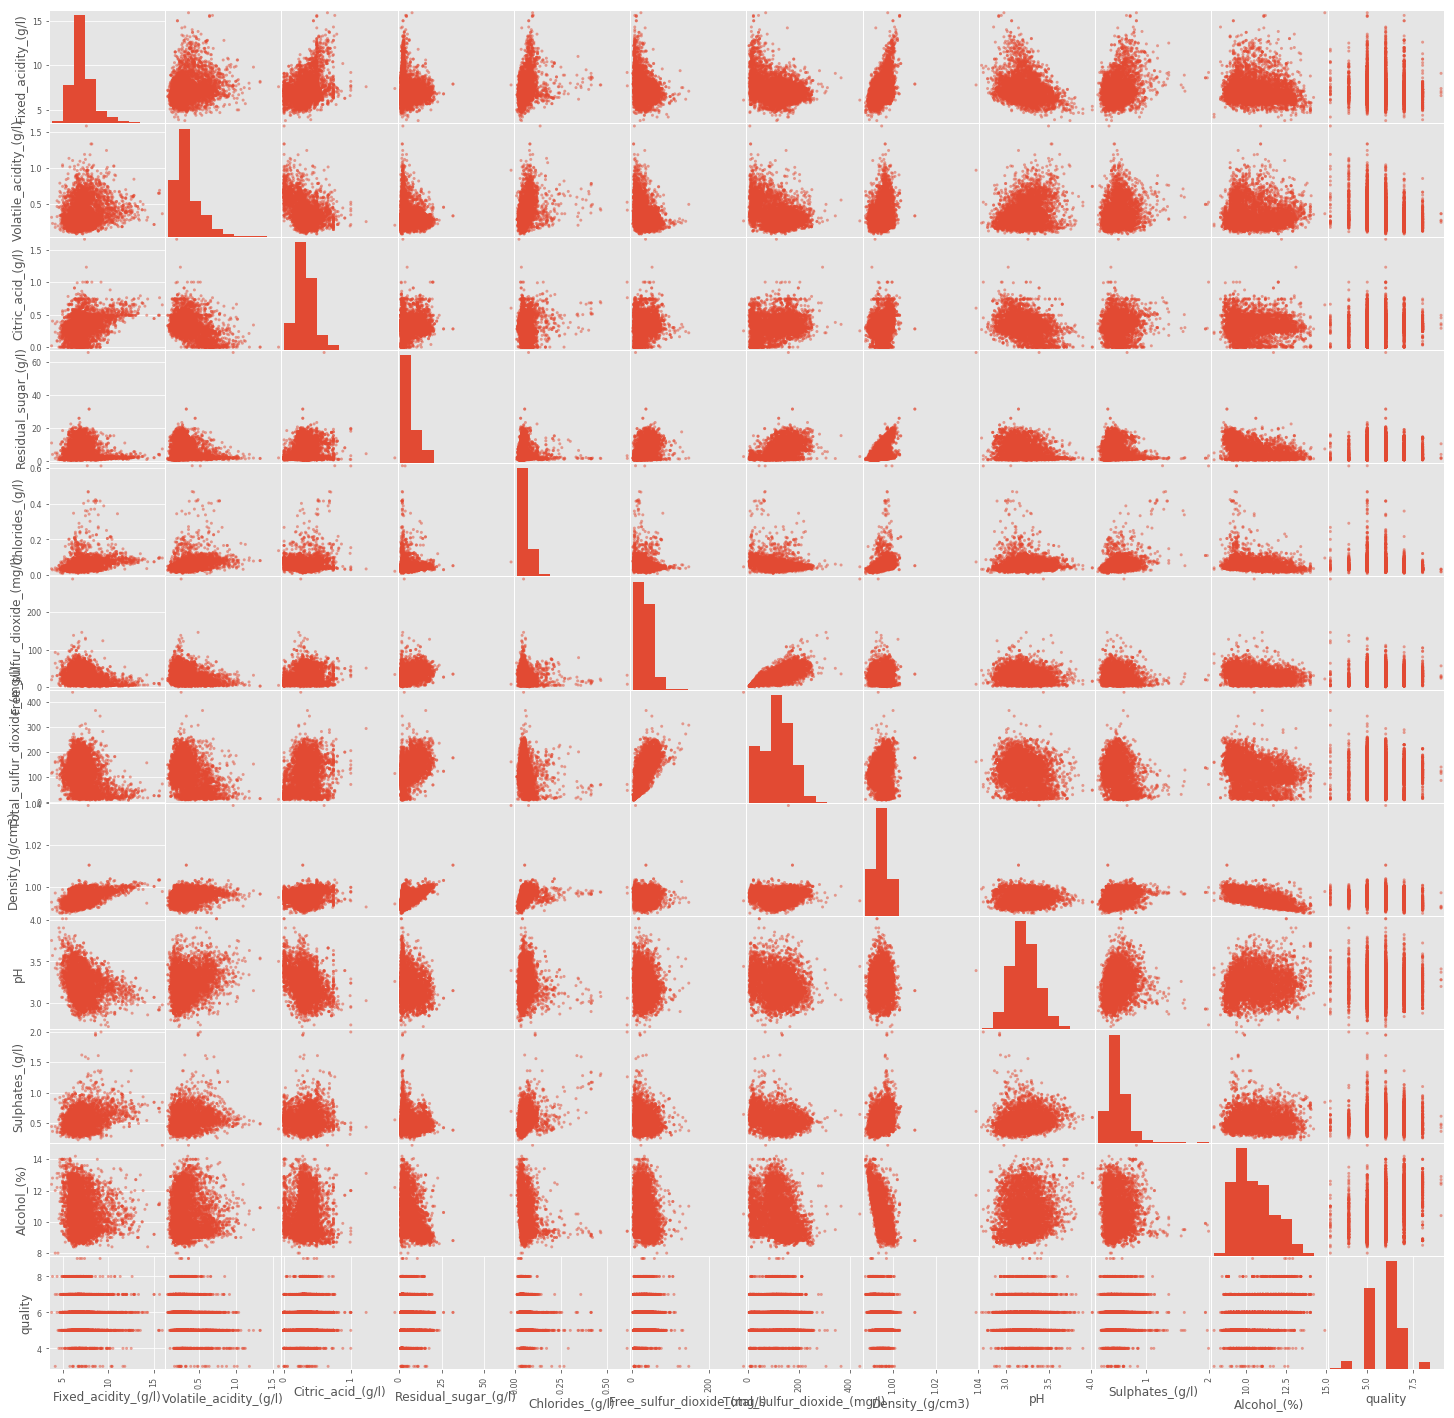

In [15]:
pd.plotting.scatter_matrix(wine, figsize=(25,25))
plt.show()